## **Data Science Aplicado a las Finanzas** 🚀
### **Sesión 13: Redes Neuronales**

Andrés C. Medina Sanhueza

Senior Data Scientist Engineer 

anmedinas@gmail.com

### 🦜 Tipos de Datos

Un aspecto fundamental a considerar, tiene relación con los `inputs`. Hasta el momento, hemos estado suponiendo que los `inputs` son valores unidimensionales o escalares, pero en la vida real esto no tiene porque ser asi. Las redes neuronales han ganado popularidad porque resuelven una gran cantidad de problemas, especialmente los complejos, y esta complejidad radica en los datos de entrada de estos modelos. Estos datos de entrada pueden ser datos tabulares, imágenes, audios y videos. 

La gran particularidad de estos datos, es que pueden ser representados mediante `Tensores`.  

<tr>
<td><img src = "inputs.png" style="width: 1000px;"/> </td>
</tr>

Un `Tensor` es una generalización de los conceptos clásicos de algebra lineal como lo son escalares, vectores y matrices. Como lo muestra la figura anterior, un `Tensor` es una estructura multidimensional usada para representar datos y operaciones matemáticas en redes neuronales. Por ejemplo, los datos que ingresan a una red neuronal son representados como tensores.

* **Imágenes** : Tensor 4D con dimensiones ($N$,$C$, $H$, $W$)
  * $N$ : número de imágenes (batches)
  * $C$ : Canales de color (RGB o monocromatico)
  * $H, W$ : Altura y Ancho de la imagen 
  
* **Texto** : Tensor en 3D con dimensiones ($N$, $L$, $d$)
  * $N$: número de ejemplos en el batch
  * $L$: longitud de la secuencia (número de palabras o caracteres)
  * $d$: dimensión de los vectores de embeddings 
  
Sin embargo, existe una complejidad en las operaciones con tensores relacionado con el tamaño y dimensionalidad que **`Pytorch`** resuelve. 

**`Pytorch`** es una biblioteca de aprendizaje automático de código abierto que se especializa en cálculo de tensores, diferenciación automática y aceleración de GPU. Por estos motivos, **`Pytorch`** es una de las bibliotecas de aprendizaje profundo más populares y compite tanto con **`Keras`** como con **`Tensorflow`**. **`Pytorch`** tiende a ser especialmente popular entre la comunidad de investigación debido a su naturaleza pitónica y su facilidad de ampliación (es decir, la implementación de tipos de capas personalizadas, arquitecturas de red, etc.). 

#### 🦩 Tensores

In [1]:
import torch 
import numpy as np

In [2]:
# Representacion de un escalar (Tensor Rank-0)
a = torch.tensor(1.)
print(a)

tensor(1.)


In [3]:
print(a.shape)

torch.Size([])


In [4]:
# Representacion de un vector (Tensor rank-1)
a = torch.tensor([1., 2., 3.])
print(a)

tensor([1., 2., 3.])


In [5]:
print(a.shape)

torch.Size([3])


In [6]:
# Representacion de un vector (Tensor rank-2)
m = torch.tensor([[1., 2., 3.],[4., 5., 6.]])
print(m)

tensor([[1., 2., 3.],
        [4., 5., 6.]])


In [7]:
print(m.shape)

torch.Size([2, 3])


In [8]:
# # Representacion de un vector 3D (Tensor rank-3)
a = torch.tensor([[[1., 2., 3.],
                   [2., 3., 4.]],
    [[5., 6., 7.],
     [8., 9., 10.]]])

In [9]:
a.shape

torch.Size([2, 2, 3])

In [10]:
# Representacion de un vector 4D (Tensor rank-4)
b = torch.stack((a, a))
b.shape

torch.Size([2, 2, 2, 3])

In [11]:
b           

tensor([[[[ 1.,  2.,  3.],
          [ 2.,  3.,  4.]],

         [[ 5.,  6.,  7.],
          [ 8.,  9., 10.]]],


        [[[ 1.,  2.,  3.],
          [ 2.,  3.,  4.]],

         [[ 5.,  6.,  7.],
          [ 8.,  9., 10.]]]])

In [12]:
# Suma de Tensores 
a = torch.tensor([1., 2. ,3.])
b = torch.tensor([4., 5., 6.])

c = a + b  
d = a - b 

In [13]:
print(c)

tensor([5., 7., 9.])


In [14]:
print(d)

tensor([-3., -3., -3.])


In [15]:
# Multiplicacion de Tensores
e = a*b
print(e)

tensor([ 4., 10., 18.])


In [16]:
torch.mul(a, b)

tensor([ 4., 10., 18.])

In [17]:
# Producto Punto
v1 = torch.tensor([1.0, 2.0, 3.0])
v2 = torch.tensor([4.0, 5.0, 6.0])
dot_product = torch.dot(v1, v2)
print(dot_product)

tensor(32.)


In [18]:
# Multiplicacion de Matrices  
torch.mul(v1, v2)

tensor([ 4., 10., 18.])

In [19]:
m1 = torch.tensor([[1, 2], [3, 4]])
m2 = torch.tensor([[5, 6], [7, 8]])
torch.mm(m1, m2)

tensor([[19, 22],
        [43, 50]])

In [20]:
# Transposicion de Matrices 
m = torch.tensor([[4.0, 7.0], [2.0, 6.0]])
torch.inverse(m)

tensor([[ 0.6000, -0.7000],
        [-0.2000,  0.4000]])

In [21]:
# Inversa de una Matriz
m = torch.tensor([[4.0, 7.0], [2.0, 6.0]])
torch.inverse(m)

tensor([[ 0.6000, -0.7000],
        [-0.2000,  0.4000]])

In [22]:
# Norma de un Tensor 
t = torch.tensor([3.0, 4.0])
torch.norm(t)

tensor(5.)

In [23]:
# Descomposicion de Valores Singulares 
m = torch.tensor([[1.0, 2.0], [3.0, 4.0]])
torch.svd(m)

torch.return_types.svd(
U=tensor([[-0.4046, -0.9145],
        [-0.9145,  0.4046]]),
S=tensor([5.4650, 0.3660]),
V=tensor([[-0.5760,  0.8174],
        [-0.8174, -0.5760]]))

In [24]:
# Valores y Vectores Propios
m = torch.tensor([[4.0, -2.0], [1.0, 1.0]])
torch.linalg.eig(m)


torch.return_types.linalg_eig(
eigenvalues=tensor([3.+0.j, 2.+0.j]),
eigenvectors=tensor([[0.8944+0.j, 0.7071+0.j],
        [0.4472+0.j, 0.7071+0.j]]))

In [25]:
# Resolucion de Ecuaciones lineales 
A = torch.tensor([[3.0, 2.0], [1.0, 2.0]])
b = torch.tensor([5.0, 5.0])
torch.linalg.solve(A, b)

tensor([-1.1921e-07,  2.5000e+00])

In [26]:
# Producto Cruz 
v1 = torch.tensor([1.0, 0.0, 0.0])
v2 = torch.tensor([0.0, 1.0, 0.0])
torch.linalg.cross(v1, v2)

tensor([0., 0., 1.])

In [27]:
# Determinantes 
a = torch.tensor([[4.0, 2.0, 1.0], [6.0, 3.0, 2.0], [1.0, -1.0, 1.0]])
torch.det(a)

tensor(3.)

In [28]:
# Generacion de Tensores Aleatorios
torch.tensor(np.random.rand(2,2))

tensor([[0.4970, 0.3441],
        [0.2490, 0.6141]], dtype=torch.float64)

In [29]:
# Tensor de Ceros
torch.zeros(3,3)

tensor([[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]])

In [30]:
# Transponer un Tensor 
c = torch.tensor([[1., 2., 3.], [4., 5., 6.]])
c.T

tensor([[1., 4.],
        [2., 5.],
        [3., 6.]])

In [31]:
# Tensor de Identidad
torch.eye(3)

tensor([[1., 0., 0.],
        [0., 1., 0.],
        [0., 0., 1.]])

### 🦉 Red Neuronal

#### 🦆 Perceptrón

Una red neuronal artificial (RNA), se describe como un modelo matemático que está inspirado en la estructura y funcionamiento del cerebro humano. Formalmente, también se puede definir como un grafo dirigido en el que los nodos, representan neuronas artificiales y las aristas ó arcos, representan conexiones con ponderaciones asociados. Las neuronas del cerebro humano están compuestas por `dendritas`, `soma` y `axón`. Las `dendritas` se encargan de captar los impulsos nerviosos que emiten nuestras neuronas. Estos impulsos se procesan en el `soma` o `núcleo` y se transmiten a través del `axón` que emite un impulso nervioso hacia las neuronas contiguas, tal como lo muestra la figura izquierda. 

<tr>
<td><img src = "ANR.png" style="width: 1000px;"/> </td>
</tr>

La figura derecha, es una abstracción del funcionamiento de una red neuronal artificial. En este contexto, es una unidad computacional que recibe entradas o `inputs`, realiza una operación matemática sobre estas (generalmente una combinación lineal mediante `linear function` llamada $z$) y luego aplica una función de activación no lineal (`activation function` $f$) para producir una salida u `output`. 


<tr>
<td><img src = "activacion.webp" style="width: 1000px;"/> </td>
</tr>

<tr>
<td><img src = "multilayer.png" style="width: 1000px;"/> </td>
</tr>

Por otro lado, las ponderaciones o pesos llamados $w$ , representan la influencia que una entrada tiene sobre la neurona. En redes biológicas, esto puede asemejarse a la fuerza sináptica que define cuánto influye una neurona sobre otra. 

Estas neuronas están organizadas en :

* `Capa de Entrada` recibe datos de entrada (similares a los estimulos sensoriales en el cerebro)
  
* `Capa de Salida` produce la salida en el modelo

* `Capa Oculta` realiza cálculos intermedios para aprender representaciones complejas

Por tanto, del mismo modo en que nuestro cerebro está compuesto por neuronas interconectadas entre sí, una red neuronal artificial esta formada por neuronas artificiales conectadas entre sí y agrupadas en diferentes niveles que denominamos `capas` o `layers`. Basicamente, una capa es un conjunto de neuronas cuyas entradas (`input layers`) provienen de una capa anterior (o de los datos de entrada en el caso de la primera capa) cuyas salidas son la entrada de una capa posterior. En el caso de la imagen, esta es una red neuronal de 5 capas. Una capa de entrada, tres capas ocultas y una capa de salida. 

#### 🐞 Perceptrón Multicapa (MLP)

Un perceptrón multicapa (MLP) es una red neuronal con una o más capas ocultas. Cada capa oculta tiene múltiples neuronas y aplica una función de activación no lineal. Un MLP puede aprender relaciones más complejas que un perceptrón simple (figura anterior).

 📌 **¿Por qué usar un MLP?** un perceptrón simple tiene limitaciones porque solo puede aprender relaciones lineales. Al agregar capas ocultas con funciones de activación no lineales, un MLP puede aprender patrones más complejos.



### 🐛 Aprendizaje de la red neuronal

📌 **¿ Cómo es el proceso de aprendizaje ?**, basicamente esto se logra ajustando sus parámetros o ponderaciones $w$ para minimizar el error entre las predicciones de la red y las etiquetas reales (objetivo). Este aprendizaje se logra mediante un proceso iterativo que incluye los siguientes pasos.

* `Forward Propagation` (propagación hacia adelante). El aprendizaje comienza con la propagación de los datos de entrada a traves de una red
  * Las entradas $x$ se combinan linealmente con los pesos $w$ y sesgos $b$ de cada neurona, de modo que la función lineal $z$ queda de la siguiente manera : $z = w\cdot x + b$
  * Se aplica la función de activación $f(z)$ para introducir la no linealidad: $a = f(z)$
  * Este proceso de aplica capa por capa hasta obtener una salida de la red $y_{\hbox pred}$

* `Loss function` (función de pérdida). La función de pérdida cuantifica el error entre la salida predicha $y_{\hbox pred}$ y la verdadera $y_{\hbox real}$. Dependiendo de la naturaleza del problema (regresión o clasificación), las funciones de pérdida clásicas son:
  
  * `Regresión` (MSE) : $ L = \frac{1}{N}\sum_{i = 1}^{N}(y_{real,i} - y_{pred, i})^2$
* 
  * `Clasificación` (Entropía Cruzada) : $ L = -\frac{1}{N}\sum_{i = 1}^{N}\sum_{j = 1}^{C} y_{real,ij}\log{y_{pred,ij}}$

* `Backward Propagation` (retropropagación). Este, es el paso en el que las neuronas aprenden. Esto, consiste en ajustar los pesos $w$ y sesgos $b$ minimizando el error calculado.
  * `Gradiente del Error`. Se calcula cómo cambia la función de perdida $L$ respecto a cada peso $w$ y sesgo $w$, es decir $\frac{\partial L}{\partial w}$ y $\frac{\partial L}{\partial b}$, esto se hace utilizando la regla de la cadena, propagando hacia atrás desde la salida hasta la entrada.
  * `Propagación inversa por capas`. Para cada capa, se calcula el gradiente de la función de pérdida respecto a sus parámetros. Los gradientes se propagan hacia atrás utilizando las derivadas parciales de la función de activación y operaciones lineales. 

* `Update` (actualización de parámetros). Una vez calculados los gradientes, los pesos y sesgos, se actualizan para reducir el error. 
  * Los parámetros se ajustan en la dirección opuesta al gradiente 
    
    \begin{equation*}
      \begin{aligned}
      w &\longleftarrow w - \eta\frac{\partial L}{\partial w} \\
      b &\longleftarrow b - \eta\frac{\partial L}{\partial b}
      \end{aligned}
    \end{equation*}
     

    Donde $\eta$ es la tasa de aprendizaje que controla la magnitud de los cambios.

* `Optimización`. Optimizadores como `Adam`, `RMSProp` y `SGD con momentum` mejoran el proceso de aprendizaje ajustando dinamicamente los pasos de actualización (veremos en detalle posteriormente). 

* `Repetición` Este ciclo (propagación hacia adelante, cálculo de pérdida, retropropagación y actualización de parámetros) se repite para múltiples épocas (iteraciones sobre los datos de entrenamiento) en donde en cada iteración, la red aprende a producir salidas más precisas.

Todo este proceso, se puede ver claramente en la siguiente animación. 

<tr>
<td><img src = "process.gif" style="width: 1000px;"/> </td>
</tr>

### 🎯 Implementaciones Computacionales

In [32]:
from sklearn.datasets import load_digits
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

sns.set_style('dark')

In [33]:
digits = load_digits()

X = digits.data
y = digits.target

In [34]:
print(f"Dimensiones de los datos: {X.shape}")
print(f"Etiquetas disponibles: {set(y)}")

Dimensiones de los datos: (1797, 64)
Etiquetas disponibles: {np.int64(0), np.int64(1), np.int64(2), np.int64(3), np.int64(4), np.int64(5), np.int64(6), np.int64(7), np.int64(8), np.int64(9)}


In [35]:
df = pd.DataFrame(X, columns = [f'Pixel_{i+1}' for i in range(X.shape[1])])
df['Label'] = y
df.head()

,Pixel_1,Pixel_2,Pixel_3,Pixel_4,Pixel_5,Pixel_6,Pixel_7,Pixel_8,Pixel_9,Pixel_10,...,Pixel_56,Pixel_57,Pixel_58,Pixel_59,Pixel_60,Pixel_61,Pixel_62,Pixel_63,Pixel_64,Label
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0,0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0,1
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0,2
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0,3
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0,4


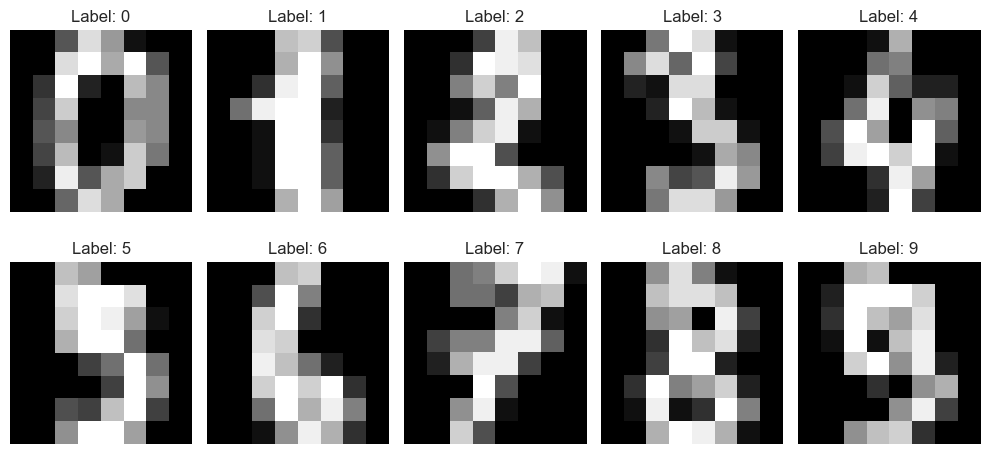

In [36]:
fig, axes = plt.subplots(2, 5, figsize = (10, 5))
for i, ax in enumerate(axes.flat):
    ax.imshow(digits.images[i], cmap = 'gray')
    ax.axis('off')
    ax.set_title(f"Label: {df['Label'][i]}")
plt.tight_layout()
plt.show()

In [37]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Dividir los datos en entrenamiento (60%), validación (20%) y prueba (20%)
X_train_full, X_test, y_train_full, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

X_train, X_val, y_train, y_val = train_test_split(
    X_train_full, y_train_full, test_size=0.25, random_state=42, stratify=y_train_full
)

# Verificar tamaños
print(f"Conjunto de entrenamiento: {X_train.shape}")
print(f"Conjunto de validación: {X_val.shape}")
print(f"Conjunto de prueba: {X_test.shape}")

Conjunto de entrenamiento: (1077, 64)
Conjunto de validación: (360, 64)
Conjunto de prueba: (360, 64)


In [38]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

#### 🎖️ MLPClassifier de `Sklearn`

`MLPClassifier` es una clase de `sklearn` que implementa una red neuronal para clasificación. Los parámetros más importantes son:

- `hidden_layer_sizes`: la cantidad de capas ocultas y la cantidad de neuronas en cada capa.
- `activation`: la función de activación para la capa oculta. Las opciones son `logistic`, `tanh` y `relu`.
- `alpha`: parámetro de regularización para controlar el sobreajuste.
- `learning_rate`: la tasa de aprendizaje en la actualización de pesos. Mientras más pequeño, más lento es el aprendizaje, pero evita que se salte los mínimos locales que buscamos.
- `max_iter`: el número máximo de iteraciones.
- `random_state`: la semilla para la inicialización de pesos.

In [39]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report

mlp = MLPClassifier(
    # Tamaño de las capas ocultas
    hidden_layer_sizes = (28, 20),
    activation = 'relu',
    max_iter = 500,
    random_state = 42
)

mlp.fit(X_train, y_train)

# Evaluar en el conjunto de validación
y_pred = mlp.predict(X_val)
print("Reporte de clasificación en el conjunto de validación:")
print(classification_report(y_val, y_pred))

Reporte de clasificación en el conjunto de validación:
              precision    recall  f1-score   support

           0       0.97      1.00      0.99        36
           1       0.95      0.95      0.95        37
           2       1.00      0.94      0.97        35
           3       1.00      1.00      1.00        37
           4       0.97      0.94      0.96        36
           5       1.00      0.94      0.97        36
           6       1.00      0.94      0.97        36
           7       0.95      1.00      0.97        36
           8       0.92      0.94      0.93        35
           9       0.90      0.97      0.93        36

    accuracy                           0.96       360
   macro avg       0.97      0.96      0.96       360
weighted avg       0.97      0.96      0.96       360



In [40]:
mlp_tuned = MLPClassifier(
    hidden_layer_sizes = (128, 64),
    activation = 'relu',
    max_iter = 500,
    random_state = 42
)
mlp_tuned.fit(X_train, y_train)

# Evaluar en validación
y_pred = mlp_tuned.predict(X_val)
print("Reporte de clasificación en el conjunto de validación:")
print(classification_report(y_val, y_pred))

Reporte de clasificación en el conjunto de validación:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        36
           1       0.97      1.00      0.99        37
           2       0.97      1.00      0.99        35
           3       0.97      1.00      0.99        37
           4       0.95      0.97      0.96        36
           5       0.97      0.94      0.96        36
           6       1.00      1.00      1.00        36
           7       1.00      1.00      1.00        36
           8       1.00      0.91      0.96        35
           9       1.00      1.00      1.00        36

    accuracy                           0.98       360
   macro avg       0.98      0.98      0.98       360
weighted avg       0.98      0.98      0.98       360



In [41]:
y_pred = mlp_tuned.predict(X_test)
print("Reporte de clasificación en el conjunto de prueba:")
print(classification_report(y_test, y_pred))

Reporte de clasificación en el conjunto de prueba:
              precision    recall  f1-score   support

           0       1.00      0.94      0.97        36
           1       0.89      0.94      0.92        36
           2       0.95      1.00      0.97        35
           3       1.00      1.00      1.00        37
           4       0.97      0.97      0.97        36
           5       0.97      1.00      0.99        37
           6       1.00      1.00      1.00        36
           7       0.97      1.00      0.99        36
           8       0.97      0.86      0.91        35
           9       1.00      1.00      1.00        36

    accuracy                           0.97       360
   macro avg       0.97      0.97      0.97       360
weighted avg       0.97      0.97      0.97       360



##### ✂️ Errores

Para entender mejor el rendimiento del modelo, podemos visualizar los errores cometidos por el modelo. Para esto, mostramos las imágenes mal clasificadas y las etiquetas reales y predichas.

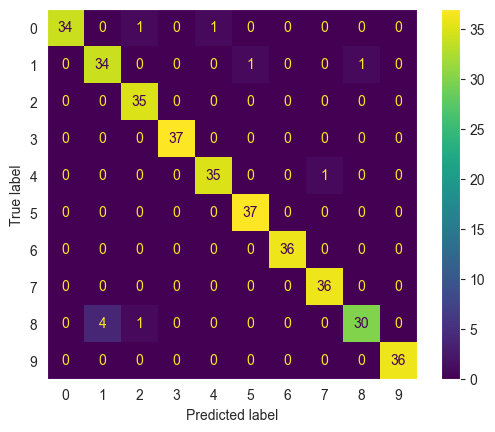

In [42]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

conf_matrix = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(conf_matrix, display_labels = digits.target_names).plot()

Cantidad de errores: 10


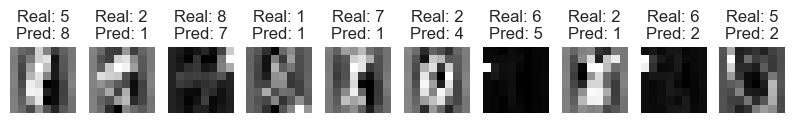

In [43]:
errors = X_test[y_test != y_pred]
errors_labels = y_pred[y_test != y_pred]

print(f"Cantidad de errores: {errors.shape[0]}")

fig, axes = plt.subplots(1, errors.shape[0], figsize=(10, 5))
for i, ax in enumerate(axes.flat):
    ax.imshow(errors[i].reshape(8, 8), cmap='gray')
    ax.axis('off')
    ax.set_title(f'Real: {y_test[i]}\nPred: {errors_labels[i]}')

#### 🔫 Pytorch 

`PyTorch` es una biblioteca de aprendizaje profundo de código abierto desarrollada por Facebook. Es una de las bibliotecas más populares para la investigación en aprendizaje profundo y se utiliza ampliamente en la industria.

En esta sección, aprenderemos a construir redes neuronales desde cero utilizando PyTorch. Comenzaremos con un modelo simple: un **perceptrón** (la unidad más básica de una red neuronal) para resolver problemas de clasificación. Luego, extenderemos nuestro modelo a un perceptrón multicapa (MLP) para mejorar el rendimiento.

##### 🧶 Preparación de Datos

Lo primero a realizar con pytorch, es pasar los datos a tensores:

- **Tensores**: son similares a los arreglos de NumPy, pero con algunas diferencias clave. Los tensores se pueden utilizar en GPU para acelerar los cálculos, lo que los hace significativamente más rápidos que los arreglos de NumPy para tareas de aprendizaje profundo.

Puedes considerar que siguen siendo simplemente un arreglo de números, pero más rápido y eficiente.

In [44]:
import torch

# Convertir los datos en tensores
X_train_tensor  = torch.tensor(X_train, dtype = torch.float32)
y_train_tensor  = torch.tensor(y_train, dtype = torch.long)
X_val_tensor    = torch.tensor(X_val, dtype = torch.float32)
y_val_tensor    = torch.tensor(y_val, dtype = torch.long)
X_test_tensor   = torch.tensor(X_test, dtype = torch.float32)
y_test_tensor   = torch.tensor(y_test, dtype = torch.long)

Luego creamos los DataLoaders.

- **DataLoaders**: son objetos que se utilizan para dividir los datos en lotes y mezclarlos. Son útiles para cargar y procesar grandes conjuntos de datos de manera eficiente.

In [45]:
from torch.utils.data import DataLoader, TensorDataset

# Crear DataLoaders
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
val_dataset = TensorDataset(X_val_tensor, y_val_tensor)
test_dataset = TensorDataset(X_test_tensor, y_test_tensor)

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=32)
test_loader = DataLoader(test_dataset, batch_size=32)

##### 🍬 Creación de un Perceptrón

Para definir un MLP en PyTorch, necesitamos extender la clase `nn.Module` y definir los métodos `__init__` y `forward`. En el método `__init__`, definimos las capas de la red y en el método `forward`, definimos cómo se calcula la salida.

Para definir una capa en `__init__`, usamos `nn.Linear` para una capa completamente conectada y `nn.ReLU` para la función de activación ReLU, lo que se ve algo asi por cada capa:

```python
self.capa = nn.Linear(input_layer_size, output_layer_size)
self.relu = nn.ReLU()
```

donde `input_layer_size` y `output_layer_size` son las dimensiones de entrada y de salida de la capa. En caso de ser la primera capa, `input_layer_size` es el tamaño de la entrada y `output_layer_size` es el tamaño de la primera capa oculta. En caso de ser la última capa, `output_layer_size` es el tamaño de la salida, osea, la cantidad de clases.

In [46]:
import torch.nn as nn

# Crear un modelo de Perceptrón Simple
class Perceptron(nn.Module):
    def __init__(self, input_size, num_classes):
        super(Perceptron, self).__init__()
        self.linear = nn.Linear(input_size, num_classes)

    def forward(self, x):
        return self.linear(x)

# Inicializar el modelo
perceptron = Perceptron(input_size=64, num_classes=10)

##### 🥇 Entrenamiento de un Perceptrón

In [47]:
def train_model(model, train_loader, val_loader, criterion, optimizer, epochs, device='cpu'):
    """
    Función general para entrenar modelos en PyTorch, con seguimiento de pérdidas y métricas.

    Args:
        model: Modelo de PyTorch a entrenar.
        train_loader: DataLoader para los datos de entrenamiento.
        val_loader: DataLoader para los datos de validación.
        criterion: Función de pérdida.
        optimizer: Optimizador para el modelo.
        epochs: Número de épocas a entrenar.
        device: CPU o GPU.

    Returns:
        metrics: Diccionario con las pérdidas y métricas de validación.
    """
    model.to(device)
    train_losses = []
    val_losses = []
    val_accuracies = []

    for epoch in range(epochs):
        # Modo de entrenamiento
        model.train()
        total_train_loss = 0

        for X_batch, y_batch in train_loader:
            X_batch, y_batch = X_batch.to(device), y_batch.to(device)
            optimizer.zero_grad()
            outputs = model(X_batch)
            loss = criterion(outputs, y_batch)
            loss.backward()
            optimizer.step()
            total_train_loss += loss.item()

        # Promediar la pérdida de entrenamiento
        avg_train_loss = total_train_loss / len(train_loader)
        train_losses.append(avg_train_loss)

        # Modo de evaluación
        model.eval()
        total_val_loss = 0
        correct = 0
        total = 0
        with torch.no_grad():
            for X_val_batch, y_val_batch in val_loader:
                X_val_batch, y_val_batch = X_val_batch.to(device), y_val_batch.to(device)
                val_outputs = model(X_val_batch)
                val_loss = criterion(val_outputs, y_val_batch)
                total_val_loss += val_loss.item()

                _, predicted = torch.max(val_outputs, 1)
                correct += (predicted == y_val_batch).sum().item()
                total += y_val_batch.size(0)

        avg_val_loss = total_val_loss / len(val_loader)
        val_losses.append(avg_val_loss)

        val_accuracy = correct / total
        val_accuracies.append(val_accuracy)

        print(f"Epoch {epoch+1}/{epochs}, Training Loss: {avg_train_loss:.4f}, Validation Loss: {avg_val_loss:.4f}, Validation Accuracy: {val_accuracy:.4f}")

    # Graficar las pérdidas
    plt.figure(figsize=(10, 6))
    plt.plot(range(1, epochs+1), train_losses, label='Training Loss')
    plt.plot(range(1, epochs+1), val_losses, label='Validation Loss', linestyle='--')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.title('Loss Evolution During Training')
    plt.legend()
    plt.show()

    return {'train_loss': train_losses, 'val_loss': val_losses, 'val_accuracy': val_accuracies}


Epoch 1/20, Training Loss: 1.0317, Validation Loss: 0.4377, Validation Accuracy: 0.8944
Epoch 2/20, Training Loss: 0.3026, Validation Loss: 0.2827, Validation Accuracy: 0.9361
Epoch 3/20, Training Loss: 0.2077, Validation Loss: 0.2297, Validation Accuracy: 0.9472
Epoch 4/20, Training Loss: 0.1629, Validation Loss: 0.1968, Validation Accuracy: 0.9500
Epoch 5/20, Training Loss: 0.1349, Validation Loss: 0.1752, Validation Accuracy: 0.9556
Epoch 6/20, Training Loss: 0.1148, Validation Loss: 0.1636, Validation Accuracy: 0.9556
Epoch 7/20, Training Loss: 0.0994, Validation Loss: 0.1535, Validation Accuracy: 0.9556
Epoch 8/20, Training Loss: 0.0884, Validation Loss: 0.1425, Validation Accuracy: 0.9583
Epoch 9/20, Training Loss: 0.0798, Validation Loss: 0.1357, Validation Accuracy: 0.9639
Epoch 10/20, Training Loss: 0.0715, Validation Loss: 0.1329, Validation Accuracy: 0.9667
Epoch 11/20, Training Loss: 0.0665, Validation Loss: 0.1231, Validation Accuracy: 0.9667
Epoch 12/20, Training Loss: 0.

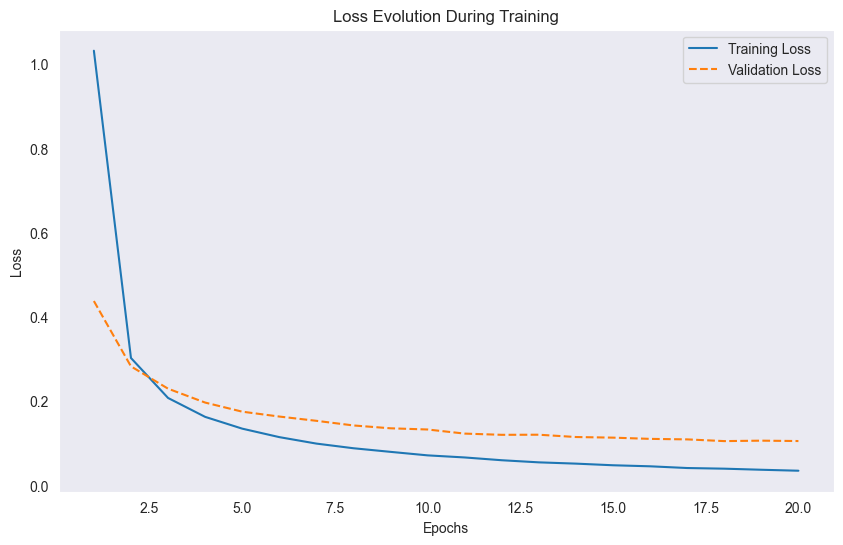

In [48]:
import torch.optim as optim

# Definir la función de pérdida
criterion = nn.CrossEntropyLoss()

# Definir el optimizador
optimizer = optim.Adam(perceptron.parameters(), lr = 0.01)

# Inicializar el perceptrón
perceptron = Perceptron(input_size=64, num_classes = 10)

# Usar la función para entrenar el modelo
metrics_perceptron = train_model(
    model = perceptron,
    train_loader = train_loader,
    val_loader = val_loader,
    criterion = nn.CrossEntropyLoss(),
    optimizer = optim.Adam(perceptron.parameters(), lr = 0.01),
    epochs = 20
)

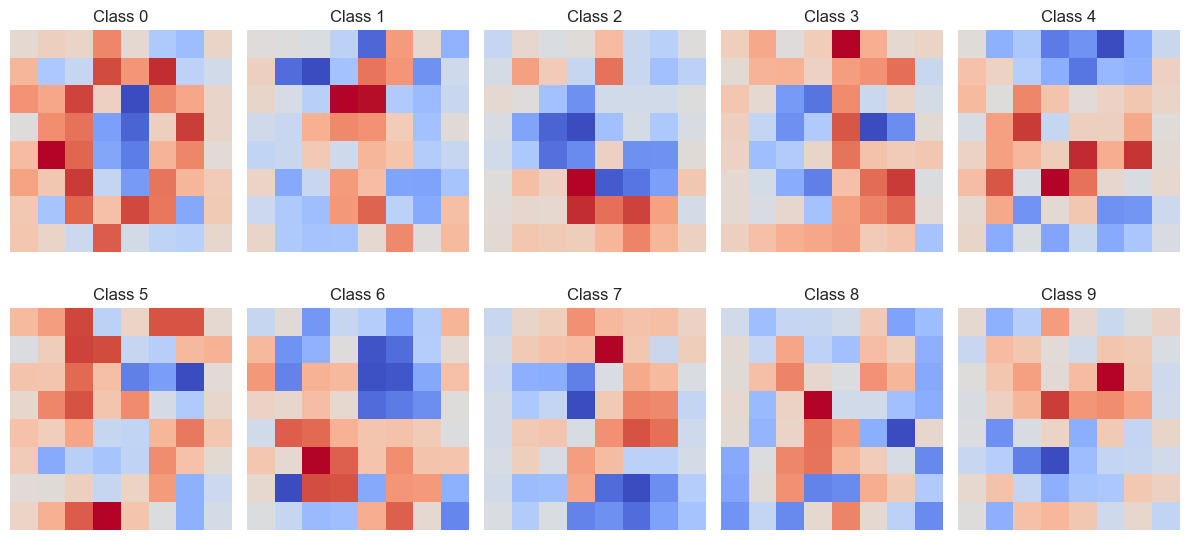

In [49]:
import matplotlib.pyplot as plt

# Obtener los pesos del modelo
weights = perceptron.linear.weight.data.numpy()

# Visualizar los pesos como imágenes
fig, axes = plt.subplots(2, 5, figsize=(12, 6))
for i, ax in enumerate(axes.flat):
    ax.imshow(weights[i].reshape(8, 8), cmap='coolwarm')
    ax.set_title(f'Class {i}')
    ax.axis('off')
plt.tight_layout()
plt.show()

##### 🏓 Extensión a un perceptrón Multicapa (MLP)

In [50]:
# Crear un Perceptrón Multicapa (MLP) para clasificación
class MLP(nn.Module):
    # Input size: Cantidad de features
    # Hidden size: Cantidad de neuronas en la capa oculta
    # Num classes: Cantidad de clases a predecir
    def __init__(self, input_size=64, hidden_size=128, num_classes=10):
        super(MLP, self).__init__()

        # No se define, pero la capa de input es en realidad el X que se recibe

        # Esta representa la capa oculta que tiene como entrada el input_size y como salida el hidden_size
        self.capa_oculta = nn.Linear(input_size, hidden_size)

        # self.capa_output representa la capa de salida que tiene como entrada el hidden_size y como salida el num_classes
        self.capa_output = nn.Linear(hidden_size, num_classes)

        # ReLU es la función de activación que se aplica a la capa oculta
        self.relu = nn.ReLU()

    def forward(self, x):
        # Pasamos x por la capa oculta
        salida_capa_oculta = self.capa_oculta(x)

        # Aplicamos la función de activación a la salida de la capa oculta
        salida_fun_activacion_capa_oculta = self.relu(salida_capa_oculta)

        # Pasamos x por la capa de salida
        output = self.capa_output(salida_fun_activacion_capa_oculta)

        return output

# Inicializar el modelo
mlp = MLP()

Epoch 1/20, Training Loss: 1.8644, Validation Loss: 1.3758, Validation Accuracy: 0.8167
Epoch 2/20, Training Loss: 1.0110, Validation Loss: 0.7221, Validation Accuracy: 0.8694
Epoch 3/20, Training Loss: 0.5443, Validation Loss: 0.4397, Validation Accuracy: 0.9278
Epoch 4/20, Training Loss: 0.3388, Validation Loss: 0.3089, Validation Accuracy: 0.9472
Epoch 5/20, Training Loss: 0.2405, Validation Loss: 0.2423, Validation Accuracy: 0.9556
Epoch 6/20, Training Loss: 0.1840, Validation Loss: 0.1991, Validation Accuracy: 0.9611
Epoch 7/20, Training Loss: 0.1463, Validation Loss: 0.1736, Validation Accuracy: 0.9639
Epoch 8/20, Training Loss: 0.1199, Validation Loss: 0.1527, Validation Accuracy: 0.9639
Epoch 9/20, Training Loss: 0.1001, Validation Loss: 0.1384, Validation Accuracy: 0.9639
Epoch 10/20, Training Loss: 0.0851, Validation Loss: 0.1275, Validation Accuracy: 0.9694
Epoch 11/20, Training Loss: 0.0721, Validation Loss: 0.1164, Validation Accuracy: 0.9694
Epoch 12/20, Training Loss: 0.

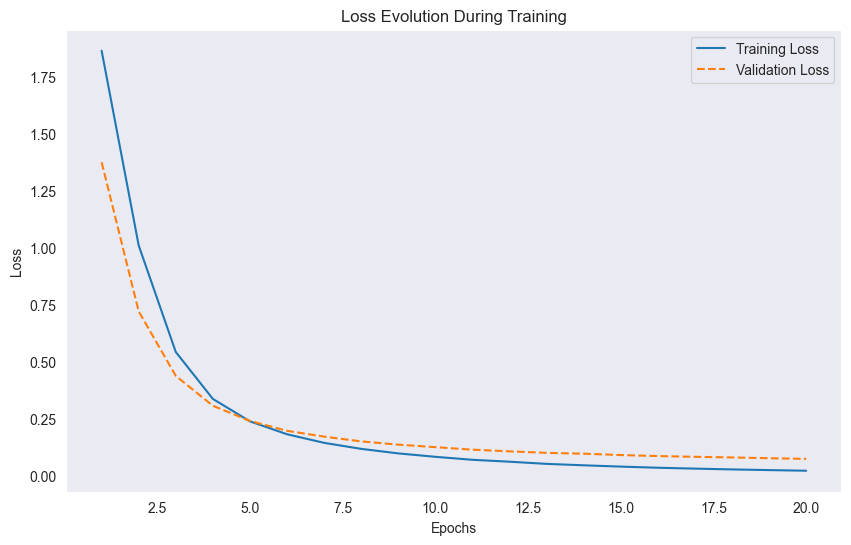

In [51]:
# Usar la función para entrenar el modelo
metrics_mlp = train_model(
    model=mlp,
    train_loader=train_loader,
    val_loader=val_loader,
    criterion=nn.CrossEntropyLoss(),
    optimizer=optim.Adam(mlp.parameters(), lr=0.001, weight_decay=0.0001),
    epochs=20)

📌 **¿Qué están aprendiendo las capas del MLP?**

Podemos visualizar los pesos de las primeras capas del MLP para entender cómo se transforman las entradas. Los pesos de la primera capa suelen representar patrones básicos, mientras que las capas más profundas capturan características más abstractas.

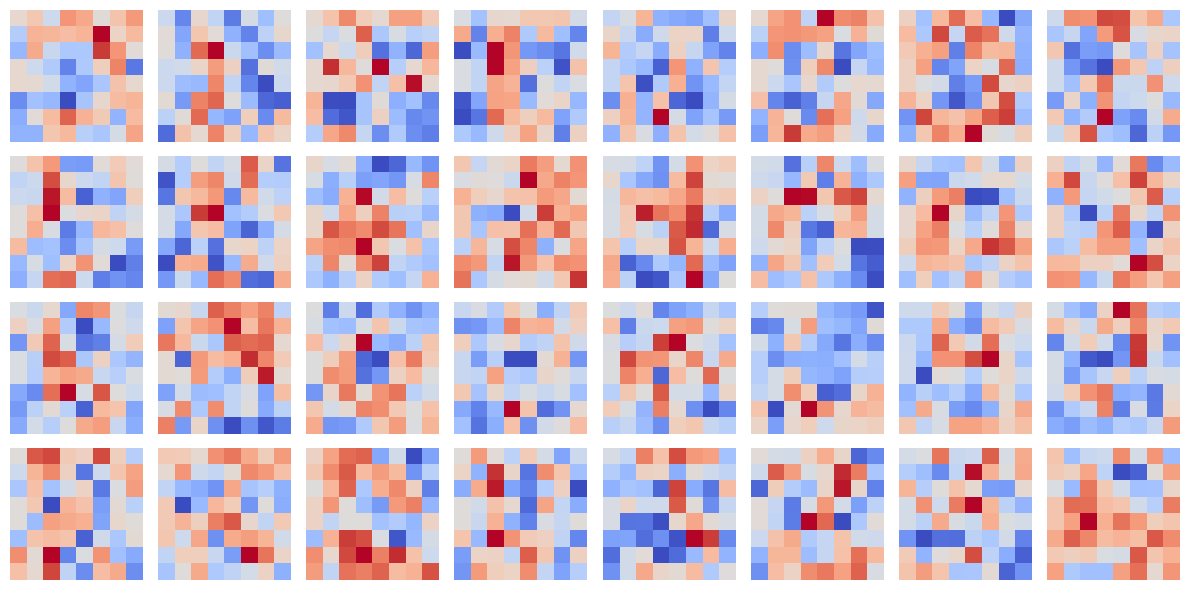

In [52]:
# Obtener los pesos de la primera capa
weights_capa_oculta = mlp.capa_oculta.weight.data.numpy()

# Visualizar los pesos como imágenes
fig, axes = plt.subplots(4, 8, figsize=(12, 6))
for i, ax in enumerate(axes.flat):
    ax.imshow(weights_capa_oculta[i].reshape(8, 8), cmap='coolwarm')
    ax.axis('off')
plt.tight_layout()
plt.show()

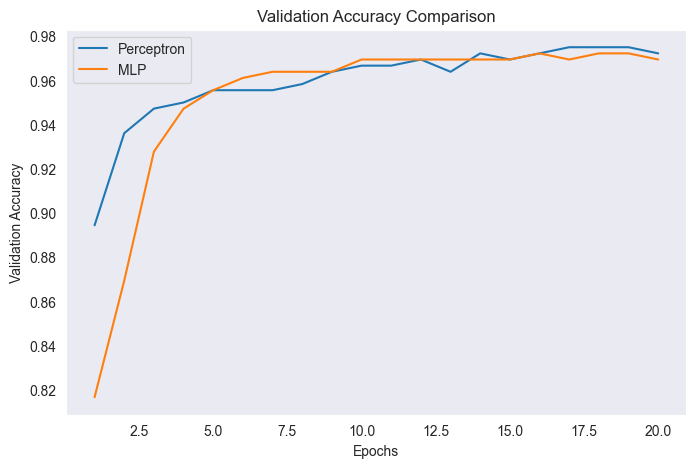

In [53]:
# Comparar las métricas de validación entre Perceptrón y MLP
plt.figure(figsize=(8, 5))
plt.plot(range(1, 21), metrics_perceptron['val_accuracy'], label='Perceptron')
plt.plot(range(1, 21), metrics_mlp['val_accuracy'], label='MLP')
plt.xlabel('Epochs')
plt.ylabel('Validation Accuracy')
plt.title('Validation Accuracy Comparison')
plt.legend()
plt.show()

In [54]:
def test_model(model, test_loader, criterion, device='cpu'):
    """
    Evalúa el modelo en un conjunto de test.

    Args:
        model: Modelo entrenado.
        test_loader: DataLoader para los datos de test.
        criterion: Función de pérdida.
        device: CPU o GPU.

    Returns:
        metrics: Diccionario con la pérdida y precisión en el conjunto de test.
    """
    model.eval()
    model.to(device)
    test_loss = 0
    correct = 0
    total = 0

    with torch.no_grad():
        for X_test_batch, y_test_batch in test_loader:
            X_test_batch, y_test_batch = X_test_batch.to(device), y_test_batch.to(device)
            outputs = model(X_test_batch)
            loss = criterion(outputs, y_test_batch)
            test_loss += loss.item()

            _, predicted = torch.max(outputs, 1)
            correct += (predicted == y_test_batch).sum().item()
            total += y_test_batch.size(0)

    avg_test_loss = test_loss / len(test_loader)
    test_accuracy = correct / total
    print(f"Test Loss: {avg_test_loss:.4f}, Test Accuracy: {test_accuracy:.4f}")

    return {'test_loss': avg_test_loss, 'test_accuracy': test_accuracy}

In [55]:
print("Perceptrón:")
test_model(perceptron, test_loader, nn.CrossEntropyLoss())
print()
print("MLP:")
test_model(mlp, test_loader, nn.CrossEntropyLoss())
print()

Perceptrón:
Test Loss: 0.1375, Test Accuracy: 0.9667

MLP:
Test Loss: 0.0948, Test Accuracy: 0.9639

